<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект-1: Анализ данных на hh.ru

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# <center>Исследование структуры данных

In [3]:
# Чтение данных
path = ''
hh_raw_data = pd.read_csv(path + 'data/dst-3.0_16_1_hh_database.csv', sep=';')
hh_raw_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [4]:
# Размерность таблицы с данными
hh_raw_data.shape

(44744, 12)

In [5]:
# Число непустых значений и тип данных
hh_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Таблица содержит 12 колонок с данными типа object и занимает 4.1 Mb памяти. Всего в базе 44744 строки с присвоенными при чтении файла индексами от 0 до 44743.

9 столбцов не содержат явных пропусков в данных. Пустые значения есть в столбце "Опыт работы", так же одно и два значения пропущены в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность" соответственно.

In [6]:
# Основная статистическая информация о столбцах
hh_raw_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


Для столбцов типа object видим: количество непустых значений, количество уникальных значений, наиболее часто встречающееся в данном столбце значение и сколько раз оно встретилось. 
Например, видно, что более половины соискателей ищут работу на полный день и полная занятость указана более чем в 30 тысячах строк. А в столбце "Опыт работы", наоборот, подавляющее большинство значений уникальны.

# <center>Преобразование данных

**1)** Преобразование признака **"Образование и ВУЗ"** в унифицированный признак **"Образование"**

In [7]:
def education_level(text):
   '''Проверяет уровень образования по первым трем словам в text,
   сообщает об ошибках и увеличивает счетчик ошибок на 1
   '''
   t = text.lower().split(' ')
   t = ' '.join(t[_] for _ in range(3))
   education_list = ['неоконченное высшее',
                     'высшее',
                     'среднее специальное',
                     'среднее',
                     ]
   for ed in education_list:
      if ed + ' образование' in t:
         return ed
   print(f'3 первых слова "{text}" не содержат данных об уровне образования из списка')
   global err_ed_count
   err_ed_count += 1
   return text


err_ed_count = 0
hh_raw_data['Образование'] = hh_raw_data['Образование и ВУЗ'].apply(education_level)
print(f'Количество ошибок при преобразовании равно {err_ed_count},\n'
      + 'столбец "Образование" содержит данные:')
display(hh_raw_data['Образование'].value_counts())

sr = hh_raw_data[hh_raw_data['Образование'] == 'среднее']['Образование'].count()
print(f'Среднее (школьное) образование имеют {sr} соискателей')

Количество ошибок при преобразовании равно 0,
столбец "Образование" содержит данные:


высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

Среднее (школьное) образование имеют 559 соискателей


**2)** Разделение признака **"Пол, возраст"** на два унифицированных признака **"Пол"** и **"Возраст"**

In [8]:
# Исключаем столбец 'Образование и ВУЗ'
hh_educ_data = hh_raw_data.drop('Образование и ВУЗ', axis=1, inplace=False)


def sex(text):
   '''Определяет пол по первому блоку до запятой в text,
   сообщает об ошибках и увеличивает счетчик ошибок на 1
   '''
   t = text.lower().split(',')[0]
   sex_list = ['мужчина', 'женщина']
   sex_ins = ['М', 'Ж']
   for s in (0, 1):
      if sex_list[s] in t:
         return sex_ins[s]
   print(f'Первый блок "{text}" не содержит данных о поле соискателя')
   global err_sex_count
   err_sex_count += 1
   return text


def age(text):
   '''Определяет возраст по второму блоку после запятой в text,
   сообщает об ошибках и увеличивает счетчик ошибок на 1
   '''
   t = text.lower().split(',')[1].split(' ')
   t = [x for x in t if x != '']   
   years_list = ['год', 'года', 'лет']
   for a in years_list:
      if a in t[1]:
         try:
            ag = int(t[0])
            return ag
         except ValueError as e:
            print(f'ValueError: {e}')
   print(f'Второй блок "{text}" не содержит данных о возрасте соискателя')
   global err_age_count
   err_age_count += 1
   return text


err_sex_count, err_age_count = 0, 0
hh_educ_data['Пол'] = hh_educ_data['Пол, возраст'].apply(sex)
print(f'Количество ошибок при определении признака "Пол" равно {err_sex_count},\n'
      + 'столбец "Пол" содержит данные:')
display(hh_educ_data['Пол'].value_counts())

wf = round(hh_educ_data[hh_educ_data['Пол'] == 'Ж']['Пол'].count() 
           / hh_educ_data['Пол'].count() * 100, 2)
print(f'В базе {wf}% женских резюме\n')

hh_educ_data['Возраст'] = hh_educ_data['Пол, возраст'].apply(age)
print(f'Количество ошибок при определении признака "Возраст" равно {err_age_count},\n'
      + 'столбец "Возраст" содержит данные:')
display(hh_educ_data['Возраст'].value_counts())

am = round(hh_educ_data['Возраст'].mean(), 1)
print(f'Средний возраст соискателей {am}')

Количество ошибок при определении признака "Пол" равно 0,
столбец "Пол" содержит данные:


М    36211
Ж     8533
Name: Пол, dtype: int64

В базе 19.07% женских резюме

Количество ошибок при определении признака "Возраст" равно 0,
столбец "Возраст" содержит данные:


30     2834
29     2765
28     2748
31     2675
27     2583
       ... 
15        2
77        1
76        1
14        1
100       1
Name: Возраст, Length: 63, dtype: int64

Средний возраст соискателей 32.2


**3)** Преобразование признака **"Опыт работы"** в **"Опыт работы, мес"**

In [9]:
# Исключаем столбец 'Пол, возраст'
hh_age_data = hh_educ_data.drop('Пол, возраст', axis=1, inplace=False)


def experience(text):
   '''Определяет опыт работы в месяцах по первому блоку до запятой в text,
   сообщает об ошибках и увеличивает счетчик ошибок на 1
   '''
   if text is np.nan or text == 'Не указано':
      return np.nan
   t = text.lower().split(' ', maxsplit=6)
   t.pop()
   years_list = ['год', 'года', 'лет']
   months_list = ['месяц', 'месяца', 'месяцев']
   y, m = 0, 0
   for i in range(len(t)):
      if t[i] in years_list:
         try:
            y = int(t[i - 1])
         except ValueError as e:
            print(f'ValueError: {e} - years mistake')
            print(text)
      if t[i] in months_list:
         try:
            m = int(t[i - 1])
         except ValueError as e:
            print(f'ValueError: {e} - months mistake')
   if (y or m) and t[0] == 'опыт' and t[1] == 'работы':
      return y * 12 + m
   print(f'Блок "{text}" не содержит данных об опыте работы')
   global err_exp_count
   err_exp_count += 1
   return text


err_exp_count = 0
hh_age_data['Опыт работы, мес'] = hh_age_data['Опыт работы'].apply(experience)
print(f'Количество ошибок при определении признака "Опыт работы, мес" равно '
      + f'{err_exp_count},\nстолбец "Опыт работы, мес" содержит данные:')
display(hh_age_data['Опыт работы, мес'].value_counts())
nn_old = hh_age_data['Опыт работы'].isnull().sum()
nn_old_ext = hh_age_data[hh_age_data['Опыт работы'] == 'Не указано']['Опыт работы'].count()
nn = hh_age_data['Опыт работы, мес'].isnull().sum()
print(f'Итого параметр "Опыт работы, мес" содержит {nn} пропусков в данных. '
      + f'К {nn_old} NAN добавилось еще {nn_old_ext} за счет скрытых значений.\n')

em = hh_age_data['Опыт работы, мес'].median()
print(f'Медианный опыт работы {em} мес.')

Количество ошибок при определении признака "Опыт работы, мес" равно 0,
столбец "Опыт работы, мес" содержит данные:


81.0     313
68.0     306
80.0     286
92.0     286
64.0     285
        ... 
517.0      1
526.0      1
556.0      1
473.0      1
622.0      1
Name: Опыт работы, мес, Length: 517, dtype: int64

Итого параметр "Опыт работы, мес" содержит 170 пропусков в данных. К 168 NAN добавилось еще 2 за счет скрытых значений.

Медианный опыт работы 100.0 мес.


**4)** Разделение признака **"Город, переезд, командировки"** на унифицированные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**

In [10]:
# Исключаем столбец 'Опыт работы'
hh_exp_data = hh_age_data.drop('Опыт работы', axis=1, inplace=False)


def city(text):
   '''Определяет город соискателя по первому блоку до запятой в text'''
   t = text.lower().split(',', maxsplit=1)[0].strip()
   cities_list = ['Москва', 'Санкт-Петербург']
   million_cities = ['новосибирск', 'екатеринбург', 'нижний новгород', 'казань', 
                     'челябинск', 'омск', 'самара', 'ростов-на-дону', 'уфа', 
                     'красноярск', 'пермь', 'воронеж', 'волгоград', 
                     ]
   for i in (0, 1):
      if t in cities_list[i].lower():
         return cities_list[i]
   if t in million_cities:
      return 'город-миллионник'
   global other_cit
   other_cit.add(t)
   return 'другие'


def relocate(text):
   '''Определяет готовность соискателя к переезду по ключевому слову в text,
   сообщает об ошибках и увеличивает счетчик ошибок на 1
   '''
   t = text.lower().split(',')
   del t[0]
   for i in range(len(t)):
      if 'перее' in t[i]:
         if 'готов' in t[i] or 'хоч' in t[i]:
            if 'не' in t[i]:
               return False
            else:
               return True
   print(f'Блок "{text}" не содержит данных о готовности к переезду')
   global err_rel_count
   err_rel_count += 1
   return text


def trips(text):
   '''Определяет готовность соискателя к командировкам по ключевому слову в text,
   сообщает об ошибках и увеличивает счетчик ошибок на 1
   '''
   t = text.lower().split(',')
   del t[0:2]
   for i in range(len(t)):
      if 'перее' not in t[i]:
         if 'готов' in t[i]:
            if 'не' in t[i]:
               return False
            else:
               return True
   global err_trp_count
   err_trp_count += 1
   return False


other_cit = set()
hh_exp_data['Город'] = hh_exp_data['Город, переезд, командировки'].apply(city)
print(f'В категорию "другие" столбца "Город" вошло {len(list(other_cit))} наименований.')
print('Столбец "Город" содержит данные:')
display(hh_exp_data['Город'].value_counts())

sp = round(hh_exp_data[hh_exp_data['Город'] == 'Санкт-Петербург']['Город'].count() 
           / hh_exp_data['Город'].count() * 100, 0)
print(f'{sp}% соискателей живут в Санкт-Петербурге\n')

err_rel_count, err_trp_count = 0, 0
hh_exp_data['Готовность к переезду'] = \
   hh_exp_data['Город, переезд, командировки'].apply(relocate)
print(f'Количество ошибок при определении признака "Готовность к переезду" равно '
      + f'{err_rel_count},\nстолбец "Готовность к переезду" содержит данные:')
display(hh_exp_data['Готовность к переезду'].value_counts())

hh_exp_data['Готовность к командировкам'] = \
   hh_exp_data['Город, переезд, командировки'].apply(trips)
print(f'Количество строк, где потерян признак "Готовность к командировкам" равно '
      + f'{err_trp_count},\nстолбец "Готовность к командировкам" содержит данные:')
display(hh_exp_data['Готовность к командировкам'].value_counts())

rr = round(hh_exp_data[(hh_exp_data['Готовность к переезду'] == True) 
   & (hh_exp_data['Готовность к командировкам'] == True)]['Готовность к переезду'].count() 
   / hh_exp_data['Готовность к переезду'].count() * 100, 0)
print(f'{rr}% соискателей готовы одновременно и к переездам, и к командировкам\n')

В категорию "другие" столбца "Город" вошло 970 наименований.
Столбец "Город" содержит данные:


Москва              16621
другие              15854
город-миллионник     7332
Санкт-Петербург      4937
Name: Город, dtype: int64

11.0% соискателей живут в Санкт-Петербурге

Количество ошибок при определении признака "Готовность к переезду" равно 0,
столбец "Готовность к переезду" содержит данные:


False    28743
True     16001
Name: Готовность к переезду, dtype: int64

Количество строк, где потерян признак "Готовность к командировкам" равно 71,
столбец "Готовность к командировкам" содержит данные:


True     31645
False    13099
Name: Готовность к командировкам, dtype: int64

32.0% соискателей готовы одновременно и к переездам, и к командировкам



**5)** One Hot Encoding признаков **"Занятость"** и **"График"**

In [11]:
# Исключаем столбец 'Город, переезд, командировки'
hh_cit_data = hh_exp_data.drop('Город, переезд, командировки', axis=1, inplace=False)


def column_list(col):
   '''Возвращает список элементов значений столбца, выделенных запятыми,
   отсортированных в порядке убывания их частоты,
   и словарь с частотами упоминания этих элементов'''
   l_col = set()
   for elem in hh_cit_data[col].value_counts().index:
      el = set(elem.split(', '))
      l_col.update(el)
   l_dict = {x: 0 for x in l_col}
   for elem in hh_cit_data[col]:
      for el in elem.split(', '):
         l_dict[el] += 1
   l_col = list(l_col)
   l_col.sort(key=lambda x: l_dict[x], reverse=True)
   return l_col, l_dict
    

def ohe_col(elem, col):
   '''Заполняет признак col значением True, если col входит в elem'''
   if col in elem.split(', '):
      return True
   return False

    
def ohe(col_old, l_col, l_dict):
   '''Преобразует признак col_old, содержащий комбинации категорий l_col, 
   в набор монокатегориальных признаков с наименованиями из l_col,
   проверяет корректность заполнения, сверяясь с частотой упоминания
   категории из l_dict'''
   print(f'Преобразуем признак "{col_old}":')
   for col in l_col:
      hh_cit_data[col] = hh_cit_data[col_old].apply(ohe_col, col=col)
      if hh_cit_data[col].sum() == l_dict[col]:
         print(f'- признак "{col}" заполнен корректно, '
               + f'количество значений True = {l_dict[col]}')
   print()


# Формируем перечень монокатегориальных признаков в порядке убывания их упоминаемости    
z_col, z_dict = column_list('Занятость')
print(f'Категории желаемой занятости в порядке убывания частоты их упоминания:\n{z_col}\n')
g_col, g_dict = column_list('График')
print(f'Категории желаемого графика в порядке убывания частоты их упоминания:\n{g_col}\n')

# Преобразуем признаки в монокатегориальные
ohe('Занятость', z_col, z_dict)
ohe('График', g_col, g_dict)

prv = hh_cit_data[hh_cit_data['волонтерство']]['проектная работа'].sum()
print(f'{prv} людей рассматривают и проектную работу и волонтёрство\n')
vgg = hh_cit_data[hh_cit_data['вахтовый метод']]['гибкий график'].sum()
print(f'{vgg} людей хотят работать вахтовым методом и с гибким графиком\n')

Категории желаемой занятости в порядке убывания частоты их упоминания:
['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство']

Категории желаемого графика в порядке убывания частоты их упоминания:
['полный день', 'гибкий график', 'удаленная работа', 'сменный график', 'вахтовый метод']

Преобразуем признак "Занятость":
- признак "полная занятость" заполнен корректно, количество значений True = 43284
- признак "частичная занятость" заполнен корректно, количество значений True = 13136
- признак "проектная работа" заполнен корректно, количество значений True = 8068
- признак "стажировка" заполнен корректно, количество значений True = 2804
- признак "волонтерство" заполнен корректно, количество значений True = 486

Преобразуем признак "График":
- признак "полный день" заполнен корректно, количество значений True = 41716
- признак "гибкий график" заполнен корректно, количество значений True = 15584
- признак "удаленная работа" заполнен корректно, количе

**6)** Преобразование признака **"ЗП"** в **"ЗП, руб"**

In [12]:
# Исключаем столбцы 'Занятость' и 'График'
hh_grf_data = hh_cit_data.drop(['Занятость', 'График'], axis=1, inplace=False)

print('Читаем курсы валют')
rates = pd.read_csv(path + 'data/ExchangeRates.csv', sep=',')
display(rates.head())
print()
print('Приводим даты в таблице с курсами валют в формат datetime')
rates['date_convert'] = pd.to_datetime(rates['date'], dayfirst=True)
print('и проверяем формат даты в rates:')
print(np.dtype(rates['date_convert']))
print()


def zp(text):
   '''Выделяет из text сумму'''
   t = text.split(' ')[0]
   try:
      t = int(t)
      return t
   except ValueError as e:
      print(f'ValueError: {e} - amount mistake')
      print(text)
      global err_am_count
      err_am_count += 1
      return text


def zp_val(text):
   '''Выделяет из text валюту и приводит ее к стандарту ISO'''
   t = text.split(' ')[1].replace('.', '')
   val_dict = {'грн':	'UAH',	
               'USD':	'USD',
               'EUR':	'EUR',
               'белруб':	'BYN',
               'KGS':	'KGS',
               'сум':	'UZS',
               'AZN':	'AZN',
               'KZT':	'KZT',
               'руб': 'RUR',
               }
   if t in val_dict.keys():
      return val_dict[t]
   print(f'Блок "{text}" неправильно определяет валюту')
   global err_val_count
   err_val_count += 1
   return text


print('Выделяем сумму ЗП в валюте')   
err_am_count = 0
hh_grf_data['amount'] = hh_grf_data['ЗП'].apply(zp)      
print(f'Количество ошибок при определении признака "amount" равно {err_am_count},\n'
      + 'столбец "amount" содержит данные типа:')
print(np.dtype(hh_grf_data['amount']))
print()

print('Выделяем валюту в ЗП')   
err_val_count = 0
hh_grf_data['val'] = hh_grf_data['ЗП'].apply(zp_val)      
print(f'Количество ошибок при определении валюты равно {err_val_count},\n'
      + 'столбец "val" содержит данные:')
display(hh_grf_data['val'].value_counts())
print()

print('Выделяем дату обновления резюме, приводим ее в формат datetime')
hh_grf_data['date_val'] = pd.to_datetime(hh_grf_data['Обновление резюме'], 
                                         dayfirst=True).dt.date
hh_grf_data['date_val'] = pd.to_datetime(hh_grf_data['date_val'])
print('и проверяем формат даты в рабочей таблице:')
print(np.dtype(hh_grf_data['date_val']))
print()

print('Добавляем данные о курсах валют в рабочую таблицу')
hh_grf_data = hh_grf_data.merge(rates[['currency', 'date_convert', 'close', 'proportion']], 
                                left_on=['date_val', 'val'], 
                                right_on=['date_convert', 'currency'],
                                how='left',
                                sort=False,
                                )
display(hh_grf_data.tail())
print()

print('Анализируем пропущенные значения:')
print('При каких значениях "val" признак "currency" содержит NaN:')
display(hh_grf_data[hh_grf_data['currency'].isnull()]['val'].value_counts())
print('При каких значениях "val" признак "close" содержит NaN:')
display(hh_grf_data[hh_grf_data['close'].isnull()]['val'].value_counts())
print('При каких значениях "val" признак "proportion" содержит NaN:')
display(hh_grf_data[hh_grf_data['proportion'].isnull()]['val'].value_counts())
print()

print('Заполняем пропущенные значения')
hh_grf_data = hh_grf_data.fillna({'currency': 'RUR', 'close': 1, 'proportion': 1})
print('"currency":')
display(hh_grf_data['currency'].value_counts().nlargest(1))
print('"close":')
display(hh_grf_data['close'].value_counts().nlargest(1))
print('"proportion":')
display(hh_grf_data['proportion'].value_counts().nlargest(1))
print()

print('Рассчитываем сумму ЗП в рублях')
hh_grf_data['ЗП, руб'] = hh_grf_data['amount'] * hh_grf_data['close'] \
                                                / hh_grf_data['proportion']
display(hh_grf_data.tail())
print()
print('Посмотрим, к примеру, как пересчиталась в рубли желаемая ЗП, заявленная в EUR:')
display(hh_grf_data[hh_grf_data['val'] == 'EUR'][['ЗП', 'ЗП, руб']])
print()

mzp = round(hh_grf_data['ЗП, руб'].median() / 1000, 0)
print(f'Желаемая медианная заработная плата соискателей в рублях равна {mzp} тысяч')

Читаем курсы валют


,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1



Приводим даты в таблице с курсами валют в формат datetime
и проверяем формат даты в rates:
datetime64[ns]

Выделяем сумму ЗП в валюте
Количество ошибок при определении признака "amount" равно 0,
столбец "amount" содержит данные типа:
int64

Выделяем валюту в ЗП
Количество ошибок при определении валюты равно 0,
столбец "val" содержит данные:


RUR    42471
KZT     1108
USD      628
BYN      329
EUR      106
UAH       73
UZS       20
KGS        6
AZN        3
Name: val, dtype: int64


Выделяем дату обновления резюме, приводим ее в формат datetime
и проверяем формат даты в рабочей таблице:
datetime64[ns]

Добавляем данные о курсах валют в рабочую таблицу


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,"Опыт работы, мес",...,удаленная работа,сменный график,вахтовый метод,amount,val,date_val,currency,date_convert,close,proportion
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,...,True,False,False,50000,RUR,2019-04-22,NaN,NaT,NaN,NaN
44740,39000 руб.,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,...,True,True,False,39000,RUR,2019-04-22,NaN,NaT,NaN,NaN
44741,40000 руб.,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,...,True,False,False,40000,RUR,2019-04-09,NaN,NaT,NaN,NaN
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,...,True,False,False,20000,RUR,2019-04-26,NaN,NaT,NaN,NaN
44743,120000 руб.,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,05.07.2018 20:15,Не указано,высшее,М,38,190.0,...,False,False,False,120000,RUR,2018-07-05,NaN,NaT,NaN,NaN



Анализируем пропущенные значения:
При каких значениях "val" признак "currency" содержит NaN:


RUR    42471
Name: val, dtype: int64

При каких значениях "val" признак "close" содержит NaN:


RUR    42471
Name: val, dtype: int64

При каких значениях "val" признак "proportion" содержит NaN:


RUR    42471
Name: val, dtype: int64


Заполняем пропущенные значения
"currency":


RUR    42471
Name: currency, dtype: int64

"close":


1.0    42471
Name: close, dtype: int64

"proportion":


1.0    43537
Name: proportion, dtype: int64


Рассчитываем сумму ЗП в рублях


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,"Опыт работы, мес",...,сменный график,вахтовый метод,amount,val,date_val,currency,date_convert,close,proportion,"ЗП, руб"
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,...,False,False,50000,RUR,2019-04-22,RUR,NaT,1.0,1.0,50000.0
44740,39000 руб.,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,...,True,False,39000,RUR,2019-04-22,RUR,NaT,1.0,1.0,39000.0
44741,40000 руб.,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,...,False,False,40000,RUR,2019-04-09,RUR,NaT,1.0,1.0,40000.0
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,...,False,False,20000,RUR,2019-04-26,RUR,NaT,1.0,1.0,20000.0
44743,120000 руб.,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,05.07.2018 20:15,Не указано,высшее,М,38,190.0,...,False,False,120000,RUR,2018-07-05,RUR,NaT,1.0,1.0,120000.0



Посмотрим, к примеру, как пересчиталась в рубли желаемая ЗП, заявленная в EUR:


,ЗП,"ЗП, руб"
145,2000 EUR,146177.60
425,5500 EUR,399583.25
1752,1500 EUR,109664.85
2220,3000 EUR,215769.60
2434,400 EUR,29062.04
...,...,...
42398,2000 EUR,146219.80
42459,1000 EUR,71923.20
42564,3000 EUR,216333.30
42955,5000 EUR,360555.50



Желаемая медианная заработная плата соискателей в рублях равна 59.0 тысяч


In [13]:
print('Удаляем лишние столбцы')
hh_prepr_data = hh_grf_data.drop(['ЗП',
                                  'amount',
                                  'val',
                                  'date_val',
                                  'date_convert',
                                  ], axis=1, inplace=False)
display(hh_prepr_data.tail())

# Сохраняем преобразованные данные для дальнейшей работы
#hh_prepr_data.to_csv(path + 'data/dst-3.0_16_1_hh_database_prepr.csv', sep=';')

Удаляем лишние столбцы


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,"Опыт работы, мес",Город,...,волонтерство,полный день,гибкий график,удаленная работа,сменный график,вахтовый метод,currency,close,proportion,"ЗП, руб"
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,...,False,True,False,True,False,False,RUR,1.0,1.0,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,...,False,True,True,True,True,False,RUR,1.0,1.0,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,True,False,True,False,False,RUR,1.0,1.0,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,False,False,True,False,False,RUR,1.0,1.0,20000.0
44743,Руководитель проекта,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,05.07.2018 20:15,Не указано,высшее,М,38,190.0,Москва,...,False,True,False,False,False,False,RUR,1.0,1.0,120000.0


# <center>Исследование зависимостей в данных

**1)** Распределение признака **"Возраст"**

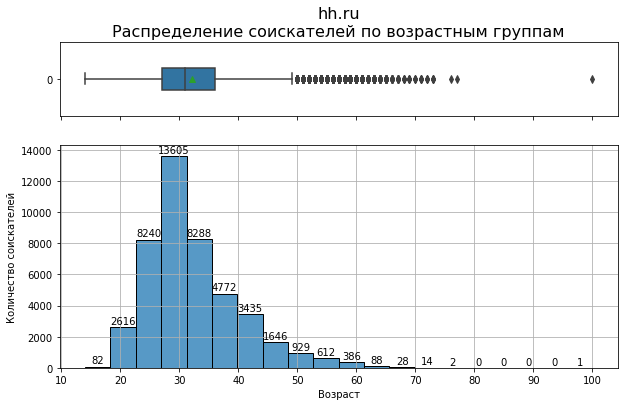

Посмотрим на характеристики распределения параметра Возраст.
Медиана = 31.0, среднее значение = 32.2, мода = 30
Левая граница по методу Тьюки = 13.5 и правая = 49.5
Количество выбросов 1774

Количество выбросов велико, все они расположены за правой границей -
распределение больше похоже на логнормальное.
Построим гистограмму и выведем характеристики распределения параметра Возраст,
используя логарифмическую шкалу и увеличив параметр метода Тьюки с 1,5 до 2.


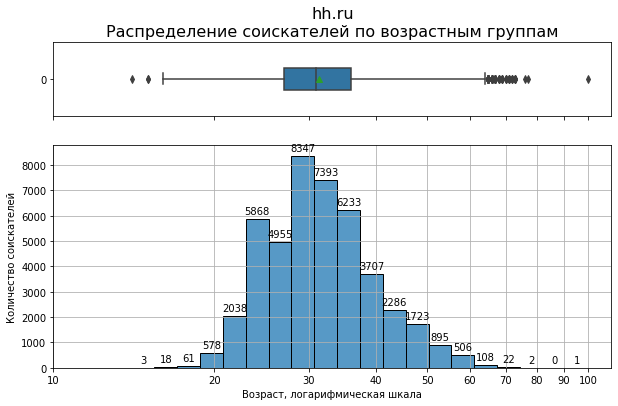

Медиана = 31.0, среднее значение = 31.3
Левая граница по методу Тьюки = 15.2 и правая = 64.0
Количество выбросов 68, два из них - левее нижней границы

Посмотрим на запись в исходной базе данных, где возраст равен 100:


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование
33654,"Мужчина , 100 лет , родился 1 января 1919",60000 руб.,Frontend-разработчик,"Санкт-Петербург , не готов к переезду , готов ...","стажировка, частичная занятость, проектная раб...","гибкий график, полный день, удаленная работа",Опыт работы 2 года 6 месяцев Февраль 2019 — п...,Freelance,Frontend-разработчик,Среднее специальное образование 2015 Санкт-Пе...,19.04.2019 23:27,Не указано,среднее специальное


In [14]:
def histogram_boxplot(data, feature, bins=None, log_scale=False, whis=1.5):
    if log_scale:
        dt = np.log10(data[feature])
    else:
        dt = data[feature]
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, 
                           gridspec_kw={"height_ratios": (.25, .75)})
    hst = sns.histplot(data=dt, kde=False, bins=bins, 
                       ax=ax[1]) 
    bxp = sns.boxplot(data=dt, orient='h',
                      ax=ax[0], showmeans=True, width=0.3, whis=whis)
    ax[0].set_title(f'hh.ru\nРаспределение соискателей по возрастным группам', 
                    fontsize=16)
    for p in hst.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        hst.text(x=p.get_x() + (p.get_width()/2), # x-coordinate in the middle of the bar
        y=height + 200,                           # y-coordinate 0.2 above bar
        s='{:.0f}'.format(height),                # data label, formatted to ignore decimals
        ha='center')                              # horizontal alignment
    #ax[1].bar_label(hst, label=hst.get_height(), label_type='center')
    ax[0].set_xlabel('')
    ax[1].set_ylabel('Количество соискателей')
    if log_scale:
        ax[1].set_xticks([np.log10(i*10) for i in range(1, 11)], 
                         labels=[i*10 for i in range(1, 11)])
        ax[1].set_xlabel('Возраст, логарифмическая шкала')
    else:
        ax[1].set_xticks([i*10 for i in range(1, 11)], labels=[i*10 for i in range(1, 11)])
    ax[1].grid()
    plt.show()
    return dt.median(), dt.mean()


def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False): 
    if log_scale:
        x = np.log10(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return lower_bound, upper_bound, outliers, cleaned    


vmd, vmn = histogram_boxplot(hh_prepr_data, 'Возраст', bins=20)
vlb, vub, vout, vcl = outliers_iqr(hh_prepr_data, 'Возраст', 
                                   left=1.5, right=1.5, log_scale=False)
print(f'Посмотрим на характеристики распределения параметра Возраст.')
print(f'Медиана = {round(vmd, 1)}, среднее значение = {round(vmn, 1)}, '
      + f"мода = {hh_prepr_data['Возраст'].mode()[0]}")
print(f'Левая граница по методу Тьюки = {round(vlb, 1)} и правая = {round(vub, 1)}')
print(f'Количество выбросов {vout.shape[0]}')
print(f'\nКоличество выбросов велико, все они расположены за правой границей -\n'
      + 'распределение больше похоже на логнормальное.\n'
      + 'Построим гистограмму и выведем характеристики распределения параметра Возраст,\n'
      + 'используя логарифмическую шкалу и увеличив параметр метода Тьюки с 1,5 до 2.')
vmdl, vmnl = histogram_boxplot(hh_prepr_data, 'Возраст', bins=20, log_scale=True, whis=2)
vlbl, vubl, voutl, vcll = outliers_iqr(hh_prepr_data, 'Возраст', 
                                       left=2, right=2, log_scale=True)
print(f'Медиана = {round(10**vmdl, 1)}, среднее значение = {round(10**vmnl, 1)}')
print(f'Левая граница по методу Тьюки = {round(10**vlbl, 1)} и правая ='
      +f' {round(10**vubl, 1)}')
print(f'Количество выбросов {voutl.shape[0]}, два из них - левее нижней границы\n')

print('Посмотрим на запись в исходной базе данных, где возраст равен 100:')
ind100 = hh_prepr_data[hh_prepr_data['Возраст'] == 100].index[0]
display(hh_raw_data[hh_raw_data.index == ind100]);


Возраст 100 лет - явная ошибка заполнения данных, вероятнее всего год рождения
должен быть 1991, что более соответствует году получения образования и опыту работы.

В остальном, среднее значение практически совпадает с медианой, т.е. нет экстремальных
значений, которые бы сильно смещали статистические характеристики. Возраст половины
соискателей лежит в интервале от 26 до 36 лет, что видно по достаточно короткому бару
боксплота. Если для логарифмического распределения увеличить параметр метода Тьюки до 2,5,
то останется всего три выброса справа - возраст 100 лет и еще две точки, ближе к 80 годам, 
которые тоже нужно будет проверить на корректность внесения данных. 

**2)** Распределение признака **"Опыт работы, мес"**

Посмотрим на записи в базе данных, соответствующие максимальному опыту:


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,"Опыт работы, мес",Город,...,волонтерство,полный день,гибкий график,удаленная работа,сменный график,вахтовый метод,currency,close,proportion,"ЗП, руб"
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,16.04.2019 08:09,Не указано,высшее,М,48,1188.0,город-миллионник,...,False,True,True,True,False,True,RUR,1.0,1.0,60000.0
3293,Руководитель проектов,430 военное представительство МО РФ,Специалист первой категории,26.04.2019 13:51,Имеется собственный автомобиль,высшее,М,73,663.0,Москва,...,False,True,False,False,False,False,RUR,1.0,1.0,50000.0
10044,Инженер слаботочных систем электрик,"ТЭК СПб, ГУП",Инженер,20.04.2019 09:46,Имеется собственный автомобиль,высшее,М,71,653.0,Санкт-Петербург,...,False,True,False,False,False,False,RUR,1.0,1.0,40000.0
44363,Эксперт (специалист) по информационной безопас...,"ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",26.04.2019 15:40,Не указано,высшее,М,70,622.0,Москва,...,False,True,False,False,False,False,RUR,1.0,1.0,350000.0
25135,Ведущий инженер-проектировщик,КБК проект,ведущий инженер ЭОМ,07.05.2019 00:29,Не указано,высшее,Ж,73,586.0,Москва,...,False,True,False,False,False,False,RUR,1.0,1.0,85000.0


Видно, что опыт работы 1188 месяцев - явная ошибка, исключим ее при построении
графика. Опыт работы в других записях соответствует возрасту.


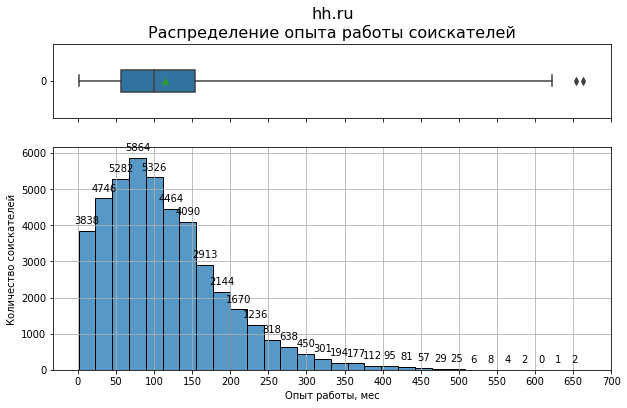

Посмотрим на характеристики распределения параметра Опыт работы, мес.
Медиана = 100.0, среднее значение = 114.4, мода = 81.0
Минимальный опыт работы = 1.0 месяц.
Левая граница по методу Тьюки = -88.5 и правая = 639.0
Количество выбросов 2


In [15]:
def histogram_boxplot(data, feature, bins=None, log_scale=False, whis=1.5):
    if log_scale:
        dt = np.log(data[feature])
    else:
        dt = data[feature]
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, 
                           gridspec_kw={"height_ratios": (.25, .75)})
    hst = sns.histplot(data=dt, kde=False, bins=bins, 
                       ax=ax[1]) 
    bxp = sns.boxplot(data=dt, orient='h',
                      ax=ax[0], showmeans=True, width=0.3, whis=whis)
    ax[0].set_title(f'hh.ru\nРаспределение опыта работы соискателей', 
                    fontsize=16)
    for p in hst.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        hst.text(x=p.get_x() + (p.get_width()/2), # x-coordinate in the middle of the bar
        y=height + 200,                           # y-coordinate 0.2 above bar
        s='{:.0f}'.format(height),                # data label, formatted to ignore decimals
        ha='center')                              # horizontal alignment
    #ax[1].bar_label(hst, label=hst.get_height(), label_type='center')
    ax[0].set_xlabel('')
    ax[1].set_ylabel('Количество соискателей')
    if log_scale:
        ax[1].set_xticks([np.log(i*50) for i in range(1, 15)], 
                         labels=[i*50 for i in range(1, 15)])
        ax[1].set_xlabel('Опыт работы, мес, логарифмическая шкала')
    else:
        ax[1].set_xticks([i*50 for i in range(15)], labels=[i*50 for i in range(15)])
    ax[1].grid()
    plt.show()
    return dt.median(), dt.mean()


def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False): 
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return lower_bound, upper_bound, outliers, cleaned    


print('Посмотрим на записи в базе данных, соответствующие максимальному опыту:')
display(hh_prepr_data.nlargest(5, columns=['Опыт работы, мес']))
print('Видно, что опыт работы 1188 месяцев - явная ошибка, исключим ее при построении\n'
      + 'графика. Опыт работы в других записях соответствует возрасту.')
hh_exp_m_data = hh_prepr_data[hh_prepr_data['Опыт работы, мес'] 
                              != hh_prepr_data['Опыт работы, мес'].max()]

omd, omn = histogram_boxplot(hh_exp_m_data, 'Опыт работы, мес', bins=30, whis=5)
olb, oub, oout, ocl = outliers_iqr(hh_exp_m_data, 'Опыт работы, мес', 
                                   left=1.5, right=5, log_scale=False)
omin = hh_prepr_data['Опыт работы, мес'].min()
print(f'Посмотрим на характеристики распределения параметра Опыт работы, мес.')
print(f'Медиана = {round(omd, 1)}, среднее значение = {round(omn, 1)}, '
      + f"мода = {hh_prepr_data['Опыт работы, мес'].mode()[0]}")
print(f'Минимальный опыт работы = {omin} месяц.')
print(f'Левая граница по методу Тьюки = {round(olb, 1)} и правая = {round(oub, 1)}')
print(f'Количество выбросов {oout.shape[0]}')

Распределения параметра Опыт работы похоже на нормальное с медианой 100 месяцев, что
соответствует 8 годам, и средним значением порядка 9,5 лет. 

Минимальный опыт работы равен 1 месяцу, а максимальные значения превышают медиану в 6,5
раз. По этой причине и среднее и медиана смещены вправо на 2-3 года относительно модального значения. В свою очередь, максимальная частота по опыту работы соискателей 
хорошо согласуется с модой по возрасту 30 лет и высшим образованием у 3/4 подавших 
резюме на hh.ru.

Для включения в границы распределения всех значений правый параметр метода Тьюки был 
увеличен до 5, при этом опыт работы половины соискателей лежит в диапазоне 50-150 месяцев,
т.е. от 4 до 12 лет. 


**3)** Распределение признака **"ЗП, руб"**

Посмотрим на записи в базе данных, соответствующие максимальному запросу по ЗП:


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,"Опыт работы, мес",Город,...,волонтерство,полный день,гибкий график,удаленная работа,сменный график,вахтовый метод,currency,close,proportion,"ЗП, руб"
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,22.04.2019 14:09,Не указано,высшее,М,31,115.0,другие,...,False,True,True,True,True,False,USD,63.9602,1.0,24304876.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,22.04.2019 15:21,Не указано,среднее специальное,М,29,98.0,другие,...,False,True,False,False,False,False,USD,63.9602,1.0,7675224.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,27.04.2019 09:41,Имеется собственный автомобиль,высшее,М,39,280.0,Москва,...,False,True,True,True,False,True,RUR,1.0000,1.0,3000000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,25.10.2018 02:49,Не указано,высшее,М,38,97.0,Москва,...,False,True,False,False,False,False,RUR,1.0000,1.0,2500000.0
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,22.04.2019 18:48,Не указано,неоконченное высшее,М,24,39.0,Москва,...,False,True,True,True,False,False,RUR,1.0000,1.0,1750000.0


Видно, что желаемая зарплата 24 млн и 7,6 млн не соответствует должности. Можно
предположить, что это желаемая ЗП за год, а не за месяц. Остальные значения не 
противоречат реальности. Желаемая ЗП выше 1 млн руб заявлена в 5 строках.

Левая граница по методу Тьюки = -49795.0 и правая = 442507.0, если правый параметр
установить равным 6. При этом количество строк с ЗП выше правой границы 72.
Исключим эти строки при построении графика для более четкой картины вблизи медианы.


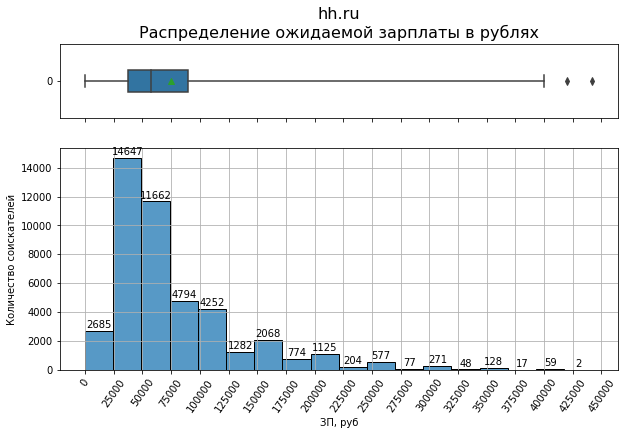

Посмотрим на характеристики распределения параметра ЗП, мес.
Медиана = 57782.0, среднее значение = 74952.0, мода = 50000.0
Минимальная желаемая зарплата = 1.0 рубль - похоже на скрытые пропуски.


In [16]:
def histogram_boxplot(data, feature, bins=None, log_scale=False, whis=1.5):
    if log_scale:
        dt = np.log(data[feature])
    else:
        dt = data[feature]
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, 
                           gridspec_kw={"height_ratios": (.25, .75)})
    hst = sns.histplot(data=dt, kde=False, bins=bins, 
                       ax=ax[1]) 
    bxp = sns.boxplot(data=dt, orient='h',
                      ax=ax[0], showmeans=True, width=0.3, whis=whis)
    ax[0].set_title(f'hh.ru\nРаспределение ожидаемой зарплаты в рублях', 
                    fontsize=16)
    for p in hst.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        hst.text(x=p.get_x() + (p.get_width()/2), # x-coordinate in the middle of the bar
        y=height + 200,                           # y-coordinate 0.2 above bar
        s='{:.0f}'.format(height),                # data label, formatted to ignore decimals
        ha='center')                              # horizontal alignment
    #ax[1].bar_label(hst, label=hst.get_height(), label_type='center')
    ax[0].set_xlabel('')
    ax[1].set_ylabel('Количество соискателей')
    if log_scale:
        ax[1].set_xticks([np.log(i*50) for i in range(1, 15)], 
                         labels=[i*50 for i in range(1, 15)])
        ax[1].set_xlabel('Опыт работы, мес, логарифмическая шкала')
    else:
        ax[1].set_xticks([i*25000 for i in range(19)], labels=[i*25000 for i in range(19)])
        ax[1].tick_params(axis='x', rotation=55)
    ax[1].grid()
    plt.show()
    return dt.median(), dt.mean()


def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False): 
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    # print(quartile_1, quartile_3)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return lower_bound, upper_bound, outliers, cleaned    


print('Посмотрим на записи в базе данных, соответствующие максимальному запросу по ЗП:')
display(hh_prepr_data.nlargest(5, columns=['ЗП, руб']))
zmln = hh_prepr_data[hh_prepr_data['ЗП, руб'] > 1000000]['ЗП, руб'].count()
print('Видно, что желаемая зарплата 24 млн и 7,6 млн не соответствует должности. Можно\n'
      + 'предположить, что это желаемая ЗП за год, а не за месяц. Остальные значения не \n'
      + f'противоречат реальности. Желаемая ЗП выше 1 млн руб заявлена в {zmln} строках.\n')
zlb, zub, zout, zcl = outliers_iqr(hh_prepr_data, 'ЗП, руб', 
                                   left=1.5, right=6, log_scale=False)
print(f'Левая граница по методу Тьюки = {round(zlb, 0)} и правая = {round(zub, 0)}, если правый параметр\n'
      + f'установить равным 6. При этом количество строк с ЗП выше правой границы {zout.shape[0]}.')
print('Исключим эти строки при построении графика для более четкой картины вблизи медианы.')
hh_low_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] <= zub]

zmd, zmn = histogram_boxplot(hh_low_z_data, 'ЗП, руб', bins=18, whis=6)
zmin = hh_prepr_data['ЗП, руб'].min()
print(f'Посмотрим на характеристики распределения параметра ЗП, мес.')
print(f'Медиана = {round(zmd, 0)}, среднее значение = {round(zmn, 0)}, '
      + f"мода = {hh_prepr_data['ЗП, руб'].mode()[0]}")
print(f'Минимальная желаемая зарплата = {zmin} рубль - похоже на скрытые пропуски.')

Даже при исключенных из рассмотрения значениях ЗП выше 6 межквартильных размахов от 75 
квартили получаем среднюю ЗП в полтора раза выше моды, медиана также смещена вправо.
При этом половина запросов по ЗП лежит в интервале 37 - 95 тысяч рублей.

Видно, что для значений выше 100 тысяч рублей характерные цифры, выбираемые соискателями, 
кратны 50 тысячам.

**4)** Зависимость медианной желаемой заработной платы **"ЗП, руб"** от уровня образования **"Образование"**

Построим столбчатую диаграмму, используя данные резюме с ЗП ниже 1 млн рублей.

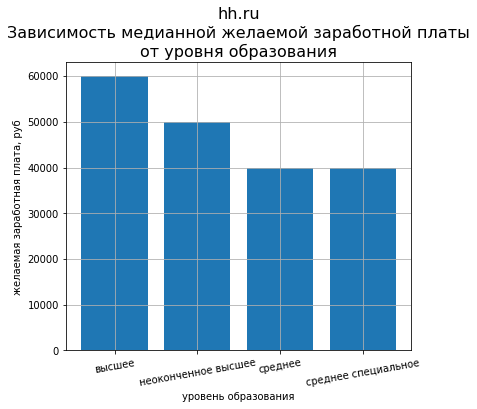

In [17]:
hh_o_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] <= 1000000].groupby(
    by='Образование')['ЗП, руб'].agg('median')

fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 0.6, 1])
ax.bar(
    hh_o_z_data.index,
    hh_o_z_data,
    )
ax.set_title(f'hh.ru\nЗависимость медианной желаемой заработной платы\n'
               + 'от уровня образования', 
               fontsize=16)
ax.set_xlabel('уровень образования')
ax.tick_params(axis='x', rotation=10)
ax.set_ylabel('желаемая заработная плата, руб')
ax.grid()
plt.show()

Медианная желаемая заработная плата соискателей со средним и средним специальным образованием равна 40 тыс. рублей, средняя планка для соискателей с неоконченным
высшим образованием выше и составляет 50 тыс.рублей. На более высокую ЗП претендуют кандидаты с высшим образованием, медиана их запросов 60 тыс.рублей. Очевидно, 
что при прогнозировании ожиданий по заработной плате необходимо учитывать уровень образования соискателя.

**5)** Распределение желаемой заработной платы **"ЗП, руб"** в зависимости от города **"Город"**

Построим столбчатую диаграмму, используя данные резюме с ЗП ниже 1 млн рублей. Для более четкой картины выведем две диаграммы с разными масштабами.

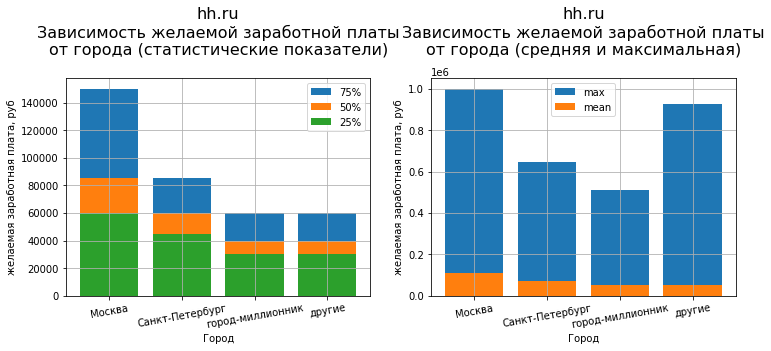

In [18]:
hh_g_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] <= 1000000].groupby(by='Город')['ЗП, руб'].agg('describe')

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
ax[0].bar(
    hh_g_z_data.index,
    hh_g_z_data['75%'],
    label='75%'
    )
ax[0].bar(
    hh_g_z_data.index,
    hh_g_z_data['50%'],
    label='50%'
    )
ax[0].bar(
    hh_g_z_data.index,
    hh_g_z_data['25%'],
    label='25%'
    )
ax[0].set_title(f'hh.ru\nЗависимость желаемой заработной платы\n'
               + 'от города (статистические показатели)\n', 
               fontsize=16)
ax[1].bar(
    hh_g_z_data.index,
    hh_g_z_data['max'],
    label='max'
    )
ax[1].bar(
    hh_g_z_data.index,
    hh_g_z_data['mean'],
    label='mean'
    )
ax[1].set_title(f'hh.ru\nЗависимость желаемой заработной платы\n'
               + 'от города (средняя и максимальная)\n', 
               fontsize=16)
for i in (0, 1):
    ax[i].set_xlabel('Город')
    ax[i].tick_params(axis='x', rotation=10)
    ax[i].set_ylabel('желаемая заработная плата, руб')
    ax[i].legend()
    ax[i].grid()
plt.show()

Отметим, во-первых, что для категорий 'город-миллионник' и 'другие' такие статистические показатели как медиана, 25я и 75я квантили совпадают. Половина пожеланий по
заработной плате в этих категориях лежит в интервале от 30 до 60 тыс.рублей с медианой 40 тыс.рублей. Для Санкт-Петербурга статистические показатели выше, а в
Москве они максимальные: половина резюме с желаемой ЗП в интервале 60 - 150 тыс.рублей и медианой 85 тыс.

В то время как для городов-миллионников, Санкт-Петербурга и Москвы аналогичная тенденция желаемых зарплат просматривается и для средних и для максимальных значений, в категории 'другие' встретилось резюме с нехарактерно высоким для этой категории пожеланием по зарплате. Конечно, это может быть выброс в данных. Но, с другой стороны, в эту собирательную категорию могли попасть резюме из населенных пунктов с действительно высокими ожиданиями по ЗП. Их совсем немного, т.к. они не сказываются на средней по категории зарплате и других статистических показателях. Но, если в целом пожелания по заработной плате коррелируют с признаком 'город', то для
категории 'другие' возможны аномальные значения.

**6)** Зависимость медианной желаемой заработной платы **"ЗП, руб"** от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**

Построим многоуровневую столбчатую диаграмму, используя данные резюме с ЗП ниже 1 млн рублей.

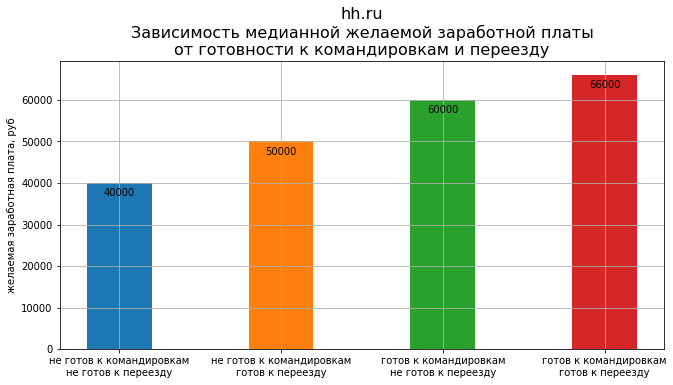

In [20]:
hh_cp_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] <= 1000000].groupby(by=[
    'Готовность к командировкам', 'Готовность к переезду'])['ЗП, руб'].agg('median')

br = [['', ''], ['', '']]
fig = plt.figure(figsize=(14, 4))
ax = fig.add_axes([0, 0, 0.6, 1])
for c in (False, True):
    for p in (False, True):
        br[c][p] = ax.bar(
            [['не готов к командировкам\nне готов к переезду', 'не готов к командировкам\nготов к переезду'], 
             ['готов к командировкам\nне готов к переезду', 'готов к командировкам\nготов к переезду']][c][p],
            hh_cp_z_data[c][p],
            label=br[c][p], width=0.4, align='center'
            )
        ax.bar_label(br[c][p], padding=-15, fmt='{:.0f}'.format(hh_cp_z_data[c][p]))   
ax.set_title(f'hh.ru\nЗависимость медианной желаемой заработной платы\n'
               + 'от готовности к командировкам и переезду', 
               fontsize=16)
ax.set_ylabel('желаемая заработная плата, руб')
ax.grid()
plt.show()

Столбчатая диаграмма показывает, что медианная желаемая заработная плата растет от наименьших 40 тыс.рублей для соискателей, не готовых ни к командировкам 
ни к переезду, до наибольших 66 тыс.рублей, когда кандидат готов и на то и на другое. При этом видно, что медианная зарплата в резюме, где указана готовность
только к командировкам, составляет 60 тыс.рублей, а в резюме, где указана готовность только к переезду, - всего 50 тыс. Т.е. можно сделать вывод, что 
за потенциальные командировки соискатели хотят большей компенсации в ЗП, чем за релокацию.

**7)** Зависимость медианной желаемой заработной платы **"ЗП, руб"** от возраста **"Возраст"** и образования **"Образование"**

Построим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста («Возраст») и образования («Образование»).

На ее основании строим тепловую карту.

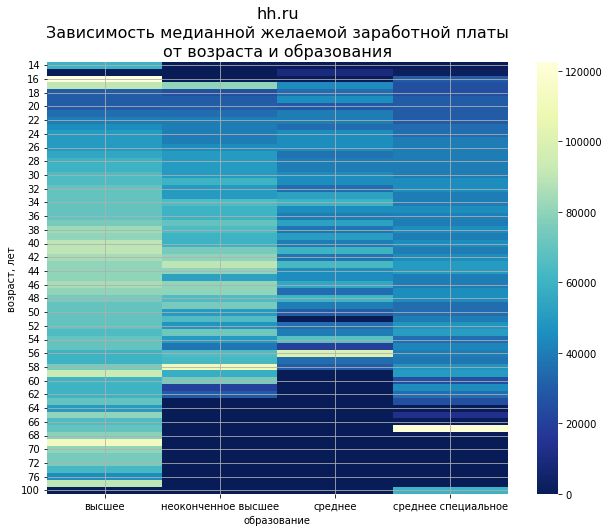

In [21]:
hh_vo_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] 
                             <= 1000000].pivot_table(values=['ЗП, руб'], 
                                                    columns='Образование', 
                                                    index='Возраст', 
                                                    aggfunc='median', 
                                                    fill_value = 0
                                                    )
fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0, 0, 0.4, 1])
sns.heatmap(hh_vo_z_data, cmap='YlGnBu_r')
ax.set_title(f'hh.ru\nЗависимость медианной желаемой заработной платы\n'
               + 'от возраста и образования', 
               fontsize=16)
ax.set_xlabel('образование')
ax.set_xticklabels([hh_vo_z_data.columns[i][1] for i in range(hh_vo_z_data.shape[1])])
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('возраст, лет')
ax.grid()
plt.show()

Тепловая карта показывает, что, в общем, зарплатные ожидания с возрастом растут и основной рост приходится на возраст до 40 лет. 
Так же подтверждается общая тенденция, что желаемые зарплаты растут в зависимости от полученного образования.

Первыми - после 58 лет - перестают подавать резюме на hh.ru для поиска работы люди со средним образованием, почти сразу за ними
перестают искать работу люди с неоконченным высшим образованием, а потом со средним специальным. Тогда как с высшим образованием
есть соискатели до 80 лет, хотя их зарплатные ожидания уже не столь высоки как в 40+.

Разовые всплески медианной ЗП (яркие светлые полосы) связаны, скорее всего, с тем, что в данном возрасте с соответствующим 
образованием в базе нет "среднестатистических" резюме, зато есть резюме с высоким ожиданием в заработной плате, которое при 
таком виде агрегирования данных не компенсируется большой статистикой.

Крайние значения - 14, 16 и 100 лет - нужно проверять на выбросы. Так же как вызывают вопросы резюме с высшим образованием до
22 лет. 

**8)** Зависимость опыта работы **"Опыт работы, мес"** от возраста **"Возраст"**

Переведем опыт работы из месяцев в года, засчитывая только полные года и отбрасывая некратные году месяцы.

Построим диаграмму рассеяния и линию y = x - 10, которая отделит неправдоподобную область с опытом работы
большим, чем возраст, уменьшенный на 10 лет .

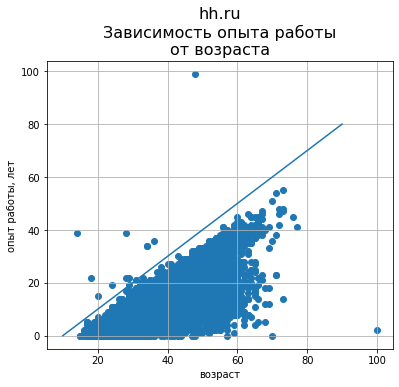

In [22]:
hh_ov_data = hh_prepr_data[['Возраст', 'Опыт работы, мес']].copy() 
hh_ov_data['Опыт работы'] = hh_ov_data['Опыт работы, мес'].apply(lambda x: x // 12)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 0.6, 1])
ax.scatter(
    hh_ov_data['Возраст'],
    hh_ov_data['Опыт работы'],
)
ax.set_title(f'hh.ru\nЗависимость опыта работы\n'
               + 'от возраста', 
               fontsize=16)
ax.set_xlabel('возраст')
#ax.tick_params(axis='x', rotation=10)
ax.set_ylabel('опыт работы, лет')
sns.lineplot(x=[x_ * 10 for x_ in range(1, 10)], y=[x_ * 10 - 10 for x_ in range(1, 10)])
ax.grid()
plt.show()

В предположении, что опыт работы не может начать исчисляться со дня рождения, построена линия y = x + 10. 
Аномальными можно считать 10 точек, и проверить еще 2, лежащие на прямой.

Так же требует проверки точка с возрастом 70 лет и без опыта работы. Ошибка в данных с возрастом 100 лет на 
диаграмме рассеяния тоже лежит вне основной области.

**9)** Зависимость медианной желаемой заработной платы **"ЗП, руб"** от признаков **"полный день"** и **"удаленная работа"**

Построим столбчатые диаграммы, используя данные резюме с ЗП ниже 1 млн рублей.

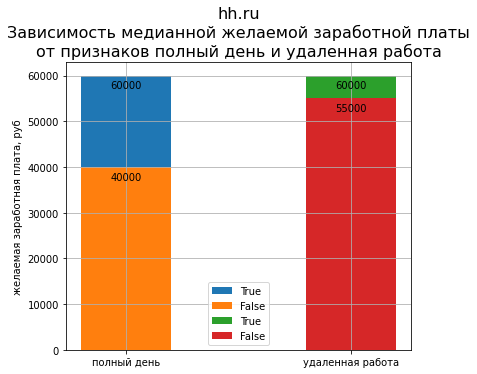

In [23]:
hh_pd_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] <= 1000000].groupby(
    by='полный день')['ЗП, руб'].agg('median')
hh_ur_z_data = hh_prepr_data[hh_prepr_data['ЗП, руб'] <= 1000000].groupby(
    by='удаленная работа')['ЗП, руб'].agg('median')

br = ['', '']
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 0.6, 1])
for b in (True, False):
    br[b] = ax.bar(
        'полный день',
        hh_pd_z_data.loc[b],
        label=b, width=0.4, align='center'
        )
    ax.bar_label(br[b], padding=-15, fmt='{:.0f}'.format(hh_pd_z_data.loc[b]))   
for b in (True, False):
    br[b] = ax.bar(
        'удаленная работа',
        hh_ur_z_data.loc[b],
        label=b, width=0.4, align='center'        
        )
    ax.bar_label(br[b], padding=-15, fmt='{:.0f}'.format(hh_ur_z_data.loc[b]))
ax.set_title(f'hh.ru\nЗависимость медианной желаемой заработной платы\n'
               + 'от признаков полный день и удаленная работа', 
               fontsize=16)
ax.legend()
ax.set_ylabel('желаемая заработная плата, руб')
ax.grid()
plt.show()

Как и ожидалось, медианная ожидаемая зарплата для соискателей, готовых работать 'полный день', в полтора раза выше, чем для ищущих варианты на неполную занятость.

Интереснее, что медианная ожидаемая заработная плата для ищущих удаленную работу оказалась хоть на 5 тыс.рублей, но выше, чем для классического варианта с
хождением на работу.

**10)** Взаимозависимость признаков **"полная занятость"** и **"полный день"**

Построим круговую диаграмму по сочетанию этих двух признаков.

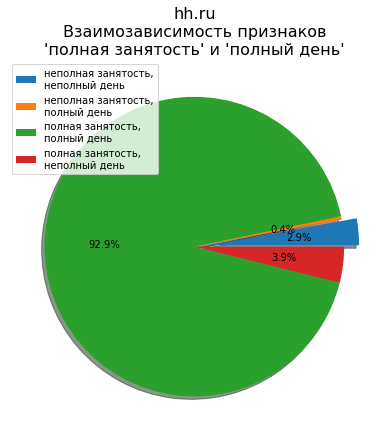

In [24]:
hh_pzpd_data = hh_prepr_data.groupby(by='полная занятость')['полный день'].value_counts()

fig = plt.figure(figsize=(10, 5.2))
ax = fig.add_axes([0, 0, 1, 1])
ax.pie(
    hh_pzpd_data,
    labels=['неполная занятость,\nнеполный день', 'неполная занятость,\nполный день', 
            'полная занятость,\nполный день', 'полная занятость,\nнеполный день'],
    labeldistance=None,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0],
    shadow=True,
)
ax.set_title(f'hh.ru\nВзаимозависимость признаков\n'
               + "'полная занятость' и 'полный день'", 
               fontsize=16)
ax.legend(loc='upper left')
plt.show()

Круговая диаграмма показывает, что 93% соискателей ищут работу с полной занятостью на полный день. Еще 4% выбрали полную занятость,
но не указали в графике работы полный день. Только 3% резюме подразумевают неполную занятость и неполный рабочий день.

В исчезающе малом количестве резюме 0,4% выбрали график работы полный рабочий день, но не стали указывать полную занятость.

Признаки 'полная занятость' и 'полный день' очень близки по смыслу. Вполне возможно, что соискатели, указавшие один признак и
не выбравшие другой, сделали это просто по невнимательности, так что с точки зрения предсказания зарплаты имеет смысл
выделять при анализе только один сегмент - неполная занятость и неполный день.

# <center>Очистка данных

**1)** Удаление **полных дубликатов** в таблице с резюме

In [25]:
hh_prepr_new_data = hh_prepr_data.drop(['полная занятость', 'частичная занятость', 'проектная работа',
                                        'стажировка', 'волонтерство', 'полный день', 'гибкий график',
                                        'удаленная работа', 'сменный график', 'вахтовый метод',
                                        'currency', 'close', 'proportion'], axis=1, inplace=False)
hh_prepr_new_data['Обновление резюме'] = pd.to_datetime(hh_prepr_new_data['Обновление резюме'], 
                                         dayfirst=True).dt.date
dupl_columns = list(hh_prepr_new_data.columns)
mask = hh_prepr_new_data.duplicated(subset=dupl_columns, keep='first')
print(f'Количество задублированных строк {mask.sum()}')
hh_undubl_data = hh_prepr_new_data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
print(f'Осталось строк в базе {hh_undubl_data.shape[0]}')

Количество задублированных строк 161
Осталось строк в базе 44583


**2)** Информация **о числе пропусков** в столбцах

In [26]:
hh_undubl_data.info()
orn = hh_undubl_data['Опыт работы, мес'].isnull().sum()
print(f'\nВ столбце "Опыт работы, мес" {orn} пропусков')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44583 entries, 0 to 44582
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  object 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  object 
 7   Возраст                          44583 non-null  int64  
 8   Опыт работы, мес                 44415 non-null  float64
 9   Город                            44583 non-null  object 
 10  Готовность к переезду            44583 non-null  bool   
 11  Готовность к командировкам       44583 non-null  bool   
 12  ЗП, руб           

**3)** Удаление строк с пропусками в столбцах с местом работы и должностью. Заполнение пропусков в столбце с опытом работы **медианным** значением.

In [32]:
hh_undubl_3_data = hh_undubl_data[(hh_undubl_data['Последнее/нынешнее место работы'].notnull()) 
                                & (hh_undubl_data['Последняя/нынешняя должность'].notnull())]
hh_undubl_3_data = hh_undubl_3_data.fillna({'Опыт работы, мес': hh_undubl_3_data['Опыт работы, мес'].median()})
print(f'среднее по столбцу "Опыт работы, мес" равно {round(hh_undubl_3_data["Опыт работы, мес"].mean(), 0)}')

среднее по столбцу "Опыт работы, мес" равно 114.0


**4)** Удаление резюме c заработной платой выше 1 миллиона рублей и ниже 1 тысячи рублей.

In [34]:
hh_undubl_4_data = hh_undubl_3_data[(hh_undubl_3_data['ЗП, руб'] >= 1000) 
                                    & (hh_undubl_3_data['ЗП, руб'] <= 1000000)]
print(f'Удалено {hh_undubl_3_data.shape[0] - hh_undubl_4_data.shape[0]} резюме '
      + 'с аномальными значениями по заработной плате.')

Удалено 89 резюме с аномальными значениями по заработной плате.


**5)** Удаление резюме, в которых опыт работы в годах превышает возраст соискателя.

In [35]:
hh_undubl_5_data = hh_undubl_4_data[hh_undubl_4_data['Опыт работы, мес'].apply(lambda x: 
    x // 12) < hh_undubl_4_data['Возраст']]
print(f'Удалено {hh_undubl_4_data.shape[0] - hh_undubl_5_data.shape[0]} резюме с опытом работы больше возраста.')

Удалено 7 резюме с опытом работы больше возраста.


**6)** Удаление выбросов в категории возраст.

Выше мы уже строили распределение категории Возраст, отмечали его логнормальный характер.

Рассчитаем теперь границы, применяя метод трех сигм, и построим еще раз логарифмическое распределение, выведя на
него линии, отображающие среднее и границы интервала метода трёх сигм. Отметим, что параметр Возраст не принимает
значение 0, поэтому при логарифмировании нет необходимости прибавлять 1.

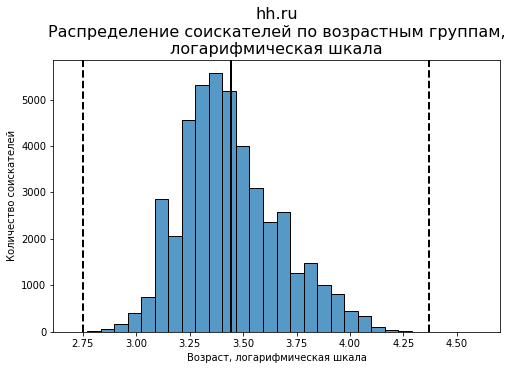

Показатель асимметрии для логарифмического распределения 0.45 > 0,
т.е. у логарифмического распределения категории Возраст есть небольшая асимметрия вправо.
В связи с этим при применении метода трех сигм сделано "послабление" на 1 сигму в правую сторону.

Удаляем 3 выброса - резюме с возрастом, превышающим 79.0 лет.
Итого в очищенной от выбросов базе осталось 44482 резюме.


In [39]:
def outliers_z_score(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned, lower_bound, upper_bound


hh_age_outliers, hh_cleaned_data, age_lb, age_ub = outliers_z_score(hh_undubl_5_data, 'Возраст',
                                                                    left=3, right=4, log_scale=True)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
log_age = np.log(hh_undubl_5_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(age_lb, color='k', ls='--', lw=2)
histplot.axvline(age_ub, color='k', ls='--', lw=2)
histplot.set_title(f'hh.ru\nРаспределение соискателей по возрастным группам,\nлогарифмическая шкала', 
                    fontsize=16)
histplot.set_xlabel('Возраст, логарифмическая шкала')
histplot.set_ylabel('Количество соискателей')
plt.show();
print(f'Показатель асимметрии для логарифмического распределения {round(log_age.skew(), 2)} > 0,\n'
      + 'т.е. у логарифмического распределения категории Возраст есть небольшая асимметрия вправо.\n'
      + 'В связи с этим при применении метода трех сигм сделано "послабление" на 1 сигму в правую сторону.\n')
print(f'Удаляем {hh_age_outliers.shape[0]} выброса - резюме с возрастом, превышающим '
      + f'{round(np.exp(age_ub), 0)} лет.')
print(f'Итого в очищенной от выбросов базе осталось {hh_cleaned_data.shape[0]} резюме.')


In [475]:
#Сохраняем очищенные данные для дальнейшей работы.
#hh_cleaned_data.to_csv(path + 'data/dst-3.0_16_1_hh_database_cleaned.csv', sep=';')